Data is filthy.

# Extraction, first look

In [42]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("choco_wprice.csv", encoding = "ANSI")

df.describe()

,REF,Review.Date,Cocoa.Percent,Rating,Bar.Price
count,1852.000000,1852.000000,1852.000000,1587.000000,1296.000000
mean,1065.007019,2012.469222,71.697354,3.264650,5.455234
std,568.299301,2.992810,6.260081,0.475335,2.569743
min,5.000000,2006.000000,42.000000,1.000000,1.004188
25%,600.000000,2010.000000,70.000000,3.000000,3.277589
50%,1099.000000,2013.000000,70.000000,3.250000,5.411294
75%,1546.000000,2015.000000,75.000000,3.500000,7.654216
max,2008.000000,2017.000000,100.000000,5.000000,9.994641


# Transformation

 • Deleting missing values

In [43]:
# Let's see how many missing values per attribute we have.
df.isnull().sum()

Company                   0
Specific.Bean.Origin      0
REF                       0
Review.Date               0
Cocoa.Percent             0
Company.Location          0
Rating                  265
Bean.Type               938
Broad.Bean.Origin        74
Bar.Price               556
dtype: int64

In [44]:
# Now, let's see the proportion of these values.
# Rule of thumb, an attribute with > 50, maybe 60% missing data is a candidate for deletion in a static dataset
missing_values_proportion = df.isnull().mean()
missing_values_proportion = df.apply(lambda x: (x == "").sum() + x.isnull().sum()) / len(df)
print(missing_values_proportion)

Company                 0.000000
Specific.Bean.Origin    0.000000
REF                     0.000000
Review.Date             0.000000
Cocoa.Percent           0.000000
Company.Location        0.000000
Rating                  0.143089
Bean.Type               0.506479
Broad.Bean.Origin       0.039957
Bar.Price               0.300216
dtype: float64


In [45]:
# For the sake of practice, we'll delete attributes missing 50% or more values
atts_to_delete = missing_values_proportion[missing_values_proportion >= 0.5].index
df = df.drop(columns=atts_to_delete)

 • Replacing missing values

In [46]:
# Are there any attributes whose values can be estimated?
# We could replace with 0, replace with mean, or replace with median.

# For Bar.Price, the mean is the most proper replacement:
df['Bar.Price'] = df['Bar.Price'].fillna(df['Bar.Price'].mean())

 • Replacing missing values stratigraphically

In [41]:
df['Rating'].isna().sum() # Missing ratings

# Estimating missing ratings according to median by company:
per_comp = df.groupby(['Company']).Rating.median()

# Replacing a few values manually
df.loc[df['Company'] == "Vicuna", 'Rating'] = df.loc[df['Company'] == "Vicuna", 'Rating'].fillna(per_comp['Vicuna'])
df.loc[df['Company'] == "Zokoko", 'Rating'] = df.loc[df['Company'] == "Zokoko", 'Rating'].fillna(per_comp['Zokoko'])
df.loc[df['Company'] == "Videri", 'Rating'] = df.loc[df['Company'] == "Videri", 'Rating'].fillna(per_comp['Videri'])

zokoko_ratings = df[df['Company'] == "Zokoko"]['Rating']
print(zokoko_ratings)

1829    3.75
1830    3.25
1831    3.50
1832    3.50
1833    3.75
Name: Rating, dtype: float64


# Checking out outliers

Boxplots show values more than three stdevs away from the median as outliers.

Could these really be of extremely high/low quality or simply anomalies? Judgment call!

<Axes: ylabel='Cocoa.Percent'>

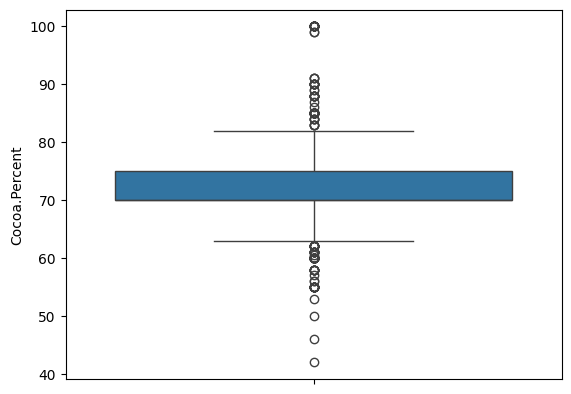

In [47]:
sns.boxplot(df['Cocoa.Percent'])